# Building a brain object

Brain objects are supereeg's fundamental data structure for a single subject's iEEG data.  To create one at minimum you'll need a matrix of neural recordings (time samples by electrodes), electrode locations, and a sample rate. Additionally, you can include information about separate recording sessions and store custom meta data. In this tutorial, we'll build a brain object from scratch and get familiar with some of the methods.

# Load in the required libraries

In [1]:
import warnings 
warnings.simplefilter("ignore")
%matplotlib inline
import supereeg as se
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate some data

First, we'll use supereeg's built in simulation functions to simulate some data and electrodes. By default, the `simulate_data` function will return a 1000 samples by 10 electrodes matrix, but you can specify the number of time samples with `n_samples` and the number of electrodes with `n_elecs`. If you want further information on simulating data, check out the simulate tutorial!

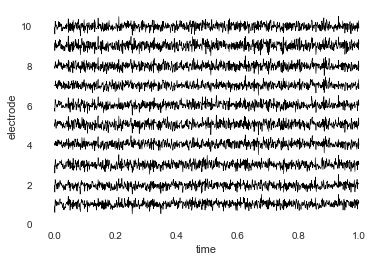

In [10]:
# simulate some data
bo_data = se.simulate_bo(n_samples=1000, sessions=2, n_elecs=10)

# plot it
bo_data.plot_data()

# get just data
data = bo_data.get_data()

We'll also simulate some electrode locations

In [11]:
locs = se.simulate_locations()
print(locs)

    x   y   z
0  13  17 -27
1  37 -50  46
2  39 -19  46
3  13  14  45
4 -27  11  23
5 -42 -13  42
6 -41 -38  32
7  26 -16  42
8  41 -31  33
9 -29 -37 -49


# Creating a brain object

To construct a new brain objects, simply pass the data and locations to the `Brain` class like this:

In [12]:
bo = se.Brain(data=data, locs=locs, sample_rate=100)

To view a summary of the contents of the brain object, you can call the `info` function:

In [13]:
bo.info()

Number of electrodes: 10
Recording time in seconds: [10.]
Sample Rate in Hz: [100]
Number of sessions: 1
Date created: Sat Mar  3 11:07:32 2018
Meta data: {}


Optionally, you can pass a `sessions` parameter, which is can be a numpy array or list the length of your data with a unique identifier for each session.  For example:

In [14]:
sessions = np.array([1]*(data.shape[0]/2)+[2]*(data.shape[0]/2))
bo = se.Brain(data=data, locs=locs, sample_rate=1000, sessions=sessions)
bo.info()

Number of electrodes: 10
Recording time in seconds: [0.5 0.5]
Sample Rate in Hz: [1000, 1000]
Number of sessions: 2
Date created: Sat Mar  3 11:07:40 2018
Meta data: {}


You can also pass add custom meta data to the brain object to help keep track of its contents. `meta` is a dictionary comprised of whatever you want:

In [15]:
meta = {
    'subjectID' : '123',
    'Investigator' : 'Andy',
    'Hospital' : 'DHMC'
}
bo = se.Brain(data=data, locs=locs, sample_rate=1000, sessions=sessions, meta=meta)
bo.info()

Number of electrodes: 10
Recording time in seconds: [0.5 0.5]
Sample Rate in Hz: [1000, 1000]
Number of sessions: 2
Date created: Sat Mar  3 11:07:43 2018
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


# The structure of a brain object

Inside the brain object, the iEEG data is stored as a Pandas DataFrame that can be accessed directly:

In [16]:
bo.data.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.458233,0.150870,-0.090667,0.237565,0.298900,-0.721709,-0.023996,-0.071999,0.585522,-0.206058
1,-2.154961,-1.945103,-1.881204,-0.425501,-0.523309,-1.445363,0.037350,-0.593516,-1.082844,-1.818513
2,1.098436,1.745436,0.845839,0.599540,1.303080,1.228986,-0.282337,0.626535,0.466923,1.109987
3,1.134250,0.857080,1.218152,0.872189,0.929280,1.008007,1.802188,1.079994,1.128753,1.156899
4,0.264730,0.997894,0.323326,-0.422629,0.350101,0.483567,0.284544,0.050370,-0.306391,-0.060072


or returned as a numpy array using the `get_data` method:

In [17]:
bo.get_data()

array([[-0.45823332,  0.15086964, -0.09066668, ..., -0.07199879,
         0.58552234, -0.20605754],
       [-2.15496126, -1.94510251, -1.88120399, ..., -0.59351578,
        -1.08284381, -1.81851315],
       [ 1.09843616,  1.7454362 ,  0.84583883, ...,  0.62653496,
         0.46692326,  1.10998661],
       ...,
       [ 0.03184456,  0.67245474,  0.05597022, ..., -1.16639286,
        -0.85277532, -0.49598038],
       [ 0.95322381,  0.4314725 ,  0.89063962, ...,  1.23626105,
         1.25782656,  1.28857893],
       [ 0.3881475 ,  0.52868986,  0.11154242, ..., -0.32791164,
         0.30783327, -0.46302767]])

Similarly, the electrode locations are stored as a Pandas DataFrame, and can be retrieved as a numpy array using the `get_locs` method:

In [18]:
bo.locs.head()

,x,y,z
0,13,17,-27
1,37,-50,46
2,39,-19,46
3,13,14,45
4,-27,11,23


In [19]:
bo.get_locs()

array([[ 13,  17, -27],
       [ 37, -50,  46],
       [ 39, -19,  46],
       [ 13,  14,  45],
       [-27,  11,  23],
       [-42, -13,  42],
       [-41, -38,  32],
       [ 26, -16,  42],
       [ 41, -31,  33],
       [-29, -37, -49]])

You can also pass a list of indices for either `times` or `locs` and return a subset of the brain object

In [20]:
bo_s = bo.get_slice(sample_inds=[1,2,3], loc_inds=[1,2,3])
bo_s.get_data()

array([[-1.94510251, -1.88120399, -0.42550077],
       [ 1.7454362 ,  0.84583883,  0.59954012],
       [ 0.8570799 ,  1.21815223,  0.87218881]])

You can resample your data by specifying a new resample rate

In [21]:
bo.resample(64)

You can also plot both the data and the electrode locations:

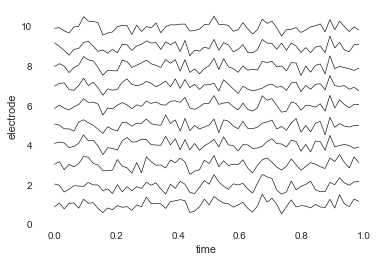

In [22]:
bo.plot_data()
plt.show()

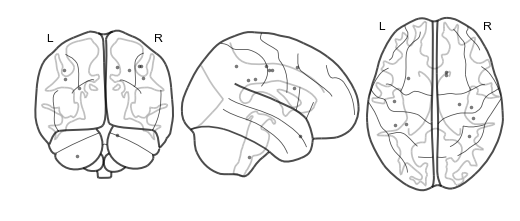

In [23]:
bo.plot_locs()

The other pieces of the brain object are listed below:

In [24]:
# array of session identifiers for each timepoint
sessions = bo.sessions

# number of sessions
n_sessions = bo.n_sessions

# sample rate
sample_rate = bo.sample_rate

# number of electrodes
n_elecs = bo.n_elecs

# length of each recording session in seconds
n_seconds = bo.n_secs

# the date and time that the bo was created
date_created = bo.date_created

# kurtosis of each electrode
kurtosis = bo.kurtosis

# meta data
meta = bo.meta

# label delinieating observed and reconstructed locations
label = bo.label

# Brain object methods

There are a few other useful methods on a brain object

## `bo.info()`

This method will give you a summary of the brain object:

In [25]:
bo.info()

Number of electrodes: 10
Recording time in seconds: [0.5 0.5]
Sample Rate in Hz: [64, 64]
Number of sessions: 2
Date created: Sat Mar  3 11:07:43 2018
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


## `bo.get_data()`

In [26]:
data_array = bo.get_data()

## `bo.get_zscore_data()`

This method will return a numpy array of the zscored data:

In [27]:
zdata_array = bo.get_zscore_data()

## `bo.get_locs()`

This method will return a numpy array of the electrode locations:

In [28]:
locs = bo.get_locs()

## `bo.get_slice()`
This method allows you to slice out time and locations from the brain object, and returns a brain object. This can occur in place if you set the flag `inplace=True`.

In [29]:
bo_slice = bo.get_slice(sample_inds=None, loc_inds=None, inplace=False)

## `bo.resample()`
This method allows you resample a brain object in place. 

In [30]:
bo.resample(resample_rate=None)

## `bo.plot_data()`

This method normalizes and plots data from brain object:

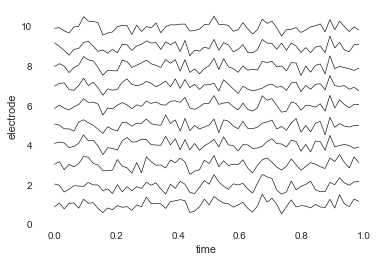

In [31]:
bo.plot_data()

## `bo.plot_locs()`
This method plots electrode locations from brain object:

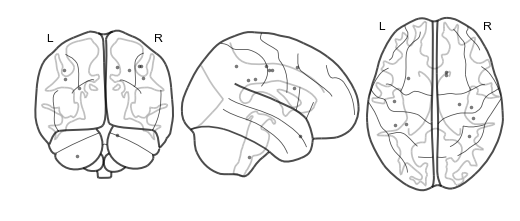

In [32]:
bo.plot_locs()

## `bo.save(fname='something')`

This method will save the brain object to the specified file location.
The data will be saved as a 'bo' file, which is a dictionary containing the elements of a brain object saved in the hd5 format using `deepdish`.

In [33]:
#bo.save(fname='brain_object')

## `bo.to_nii()`

This method converts the brain object into a `nibabel` nifti image.  If `filepath` is specified, the nifti file will be saved. You can also specify a nifti template with the `template` argument. If no template is specified, it will y

In [ ]:
# convert to nifit
# nii = bo.to_nii()

# save the file
# nii = bo.to_nii(filepath='/path/to/file/brain')

# specify a template and resolution
# nii = bo.to_nii(template='/path/to/nifti/file.nii', vox_size=20)